## Example Code for Interval K-means

In [1]:
from interClusLib.IntervalData import IntervalData
from interClusLib.preprocessing import min_max_normalize
from interClusLib.clustering.IntervalKMeans import IntervalKMeans
from interClusLib.visualization import Interval3d, IntervalParallelCoordinates
from interClusLib.evaluation import *
from interClusLib.cluster_number_analysis import *

In [2]:
clustered_data = IntervalData.make_interval_blobs(n_clusters=3, n_dims=3, n_samples= 200)

clustered_data.summary()

Data Summary:
       Feature_1_lower  Feature_1_upper  Feature_2_lower  Feature_2_upper  \
count       200.000000       200.000000       200.000000       200.000000   
mean          0.491502         2.731796        -1.418307         1.193624   
std           8.508358         8.085272         7.015203         7.317818   
min         -13.463635       -11.481259       -13.550388       -11.495488   
25%         -10.362595        -7.570188       -10.344738        -8.144552   
50%           3.515491         6.310664         2.742829         5.253853   
75%           8.172189         9.471412         3.874958         6.802404   
max          11.941518        13.807542         6.598872         9.928970   

       Feature_3_lower  Feature_3_upper  
count       200.000000       200.000000  
mean          2.037099         4.799443  
std           2.916587         2.255950  
min          -3.680006        -0.037804  
25%          -0.438919         3.003176  
50%           1.595662         4.507942 

In [3]:
data = clustered_data.get_intervals()

data = min_max_normalize(data)

In [4]:
kmeans = IntervalKMeans(n_clusters=3, max_iter=1000, distance_func='euclidean', random_state=43)

kmeans.fit(data)

In [5]:
print(kmeans.centroids_)
print(kmeans.get_labels())

[[[0.08547687 0.18987495]
  [0.10326476 0.19789656]
  [0.14756374 0.41428211]]

 [[0.72351317 0.79798872]
  [0.72561668 0.8453195 ]
  [0.51873296 0.67991928]]

 [[0.09692662 0.18749637]
  [0.1008169  0.19509394]
  [0.24674797 0.52620793]]]
[1 1 1 2 1 1 1 0 2 0 0 0 1 1 1 0 0 1 1 2 2 0 1 1 1 1 0 1 1 0 0 1 2 1 0 1 0
 1 1 1 1 0 1 2 1 0 1 1 0 2 1 1 1 1 1 1 0 1 0 1 1 1 2 1 1 2 2 0 2 0 2 0 1 1
 1 1 1 0 1 1 2 0 1 2 1 1 1 1 0 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 0
 1 0 1 1 1 1 1 1 0 2 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 0 0 1 1 1 1 0 1 1
 2 2 1 2 1 1 1 1 1 2 1 1 1 2 1 1 2 1 1 1 1 2 1 2 1 1 1 2 1 1 1 2 1 1 1 1 1
 2 2 2 1 0 1 1 0 1 1 1 2 0 1 0]


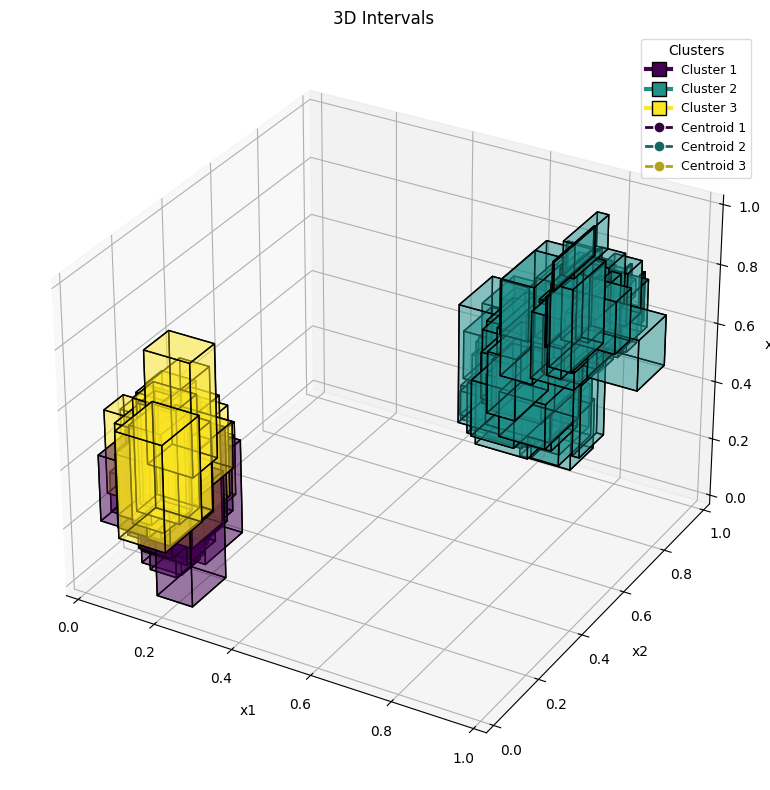

In [6]:
fig, ax = Interval3d.visualize(intervals=data, labels=kmeans.labels_, centroids=kmeans.centroids_, margin=0.01)

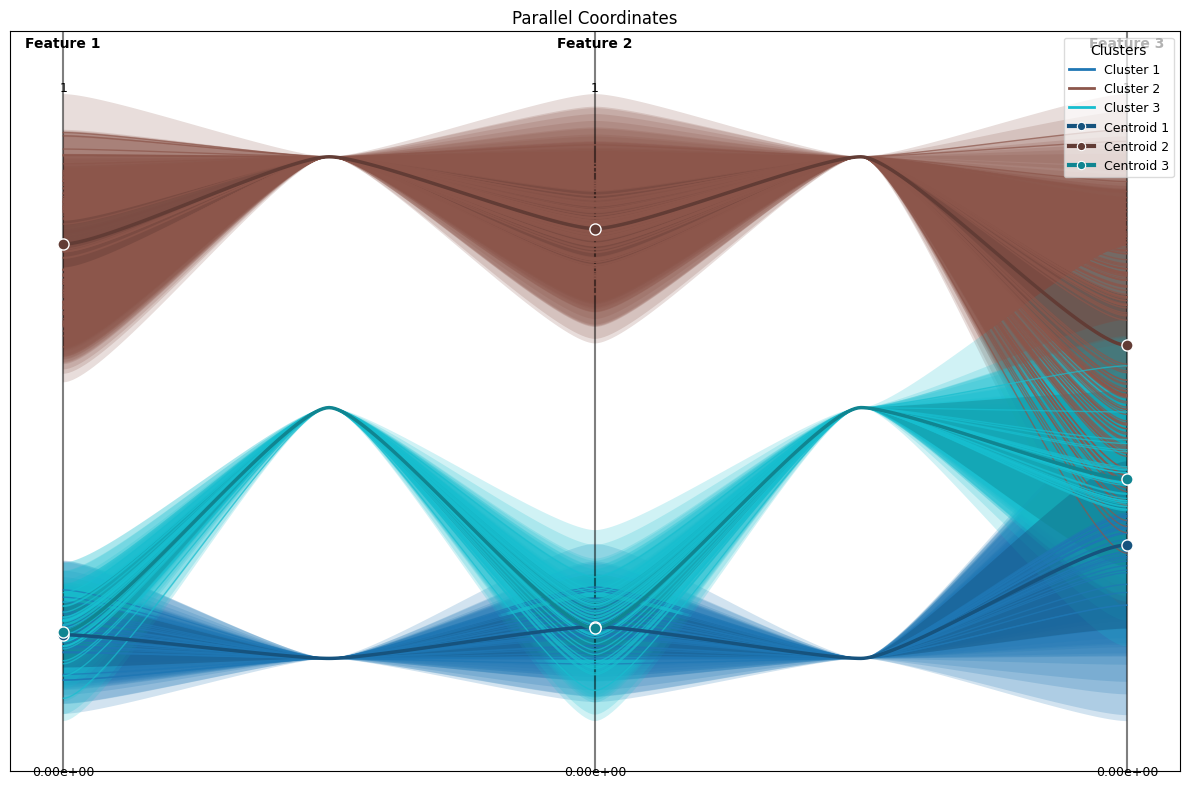

In [7]:
fig, ax = IntervalParallelCoordinates.visualize(intervals=data, labels=kmeans.labels_, centroids=kmeans.centroids_, beta= 1)

In [8]:
metric_results = kmeans.compute_metrics_for_k_range(
    data,
    min_clusters=2,
    max_clusters=10,
    metrics=['distortion', 'silhouette', 'davies_bouldin','calinski_harabasz','dunn'],
)

print(metric_results)

{'distortion': {2: 0.05496474855658508, 3: 0.02001819264229016, 4: 0.017498680469710638, 5: 0.01683608614757838, 6: 0.014981458473378728, 7: 0.013242256008611276, 8: 0.012667559062558955, 9: 0.012456994324928257, 10: 0.012045169836373791}, 'silhouette': {2: 0.7839736055309449, 3: 0.6844398590035989, 4: 0.577013880701779, 5: 0.5464334764609887, 6: 0.33930013749837795, 7: 0.22404955160389947, 8: 0.22002615231445724, 9: 0.20213998000609737, 10: 0.2046353752224316}, 'davies_bouldin': {2: 0.29369954545841837, 3: 0.46419858280701426, 4: 0.8035935090127667, 5: 1.1205505992435612, 6: 1.3936558219332362, 7: 1.517515388132354, 8: 1.481684395404111, 9: 1.5339148231732649, 10: 1.5277528733103771}, 'calinski_harabasz': {2: 1386.2470439567533, 3: 2065.4804202846735, 4: 1576.660328916783, 5: 1224.681068947674, 6: 1100.1891618768525, 7: 1036.115650289573, 8: 924.8241260648243, 9: 819.0172765899999, 10: 749.6860817828278}, 'dunn': {2: 1.019378658072492, 3: 0.34412244210876447, 4: 0.11182118805138659, 5

L Method optimal k: 3
Elbow Method optimal k: 3


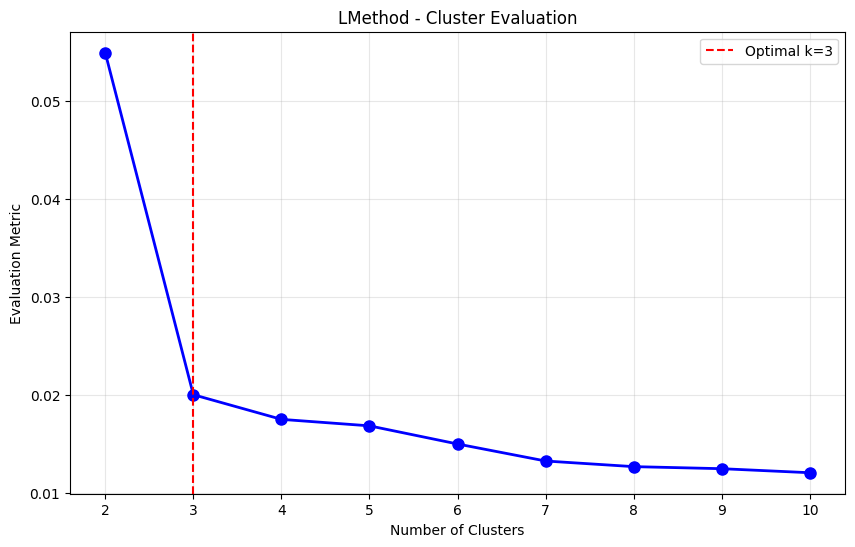

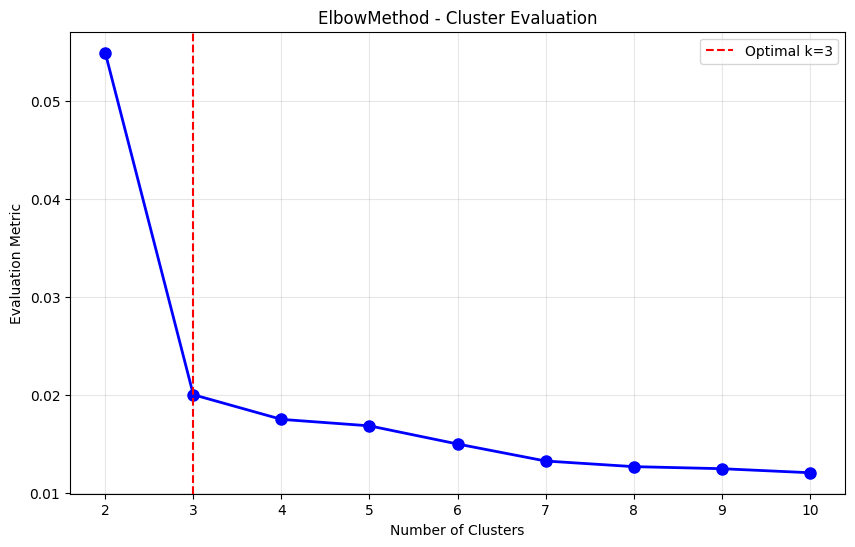

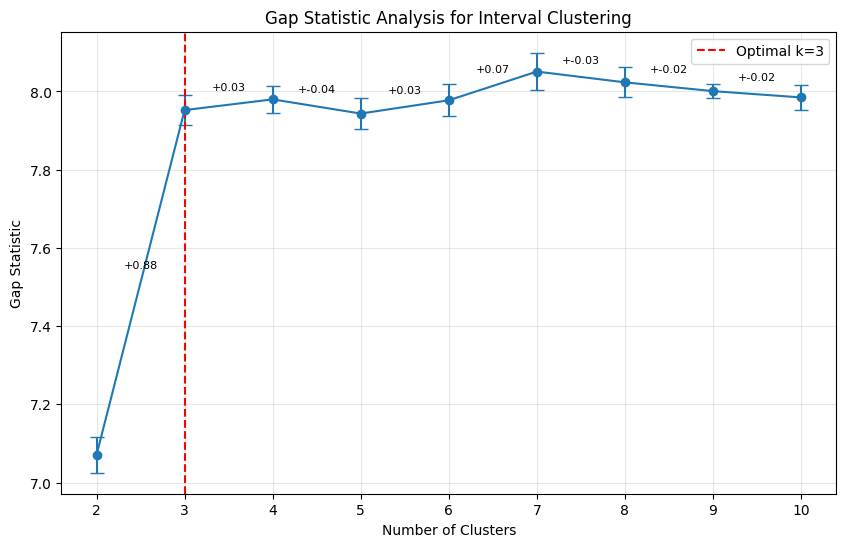

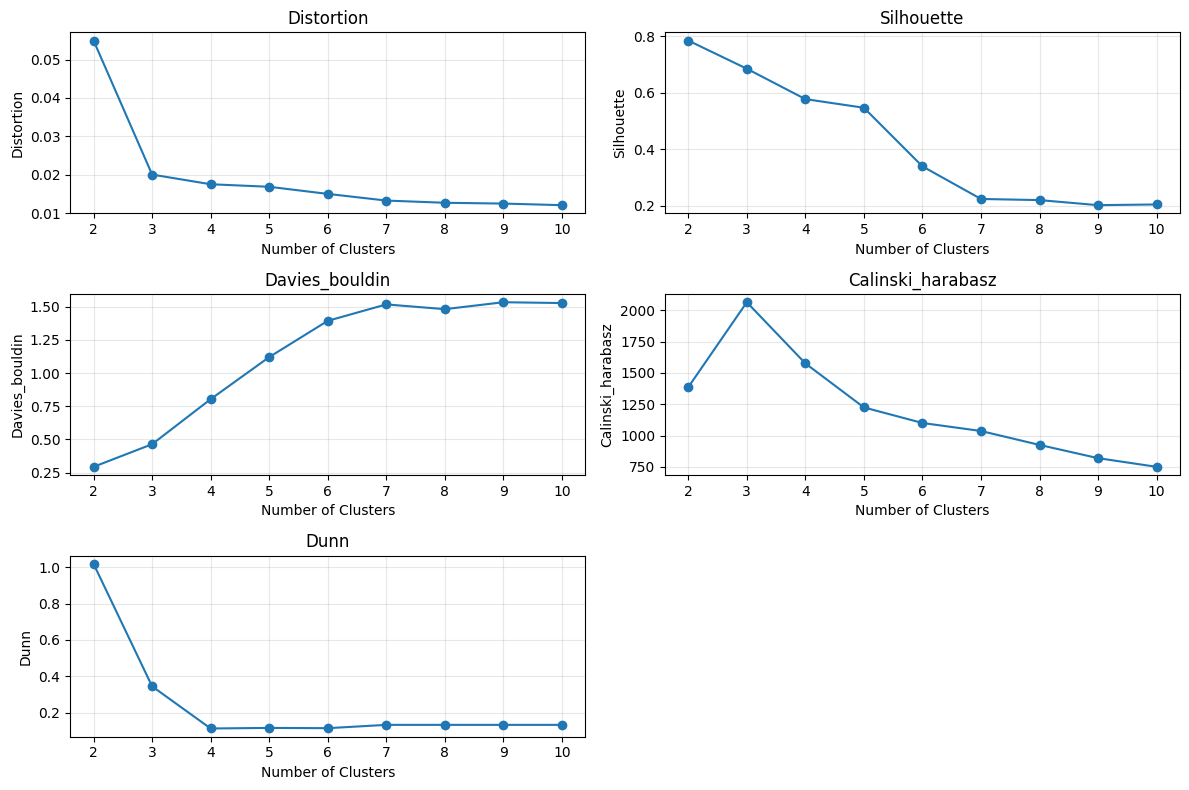

In [9]:
# 使用L方法确定最佳聚类数
l_method = LMethod(min_clusters=2, max_clusters=10)
optimal_k_l = l_method.evaluate(metric_results['distortion'])
plt = l_method.plot()
print(f"L Method optimal k: {optimal_k_l}")

# 使用肘部法则确定最佳聚类数
elbow = ElbowMethod(min_clusters=2, max_clusters=10, second_derivative= True)
optimal_k_elbow = elbow.evaluate(metric_results['distortion'])
print(f"Elbow Method optimal k: {optimal_k_elbow}")
plt = elbow.plot()

def cluster(intervals, k):
    return kmeans.cluster_and_return(intervals, k)

# 初始化 GapStatistic
gap_evaluator = GapStatistic(min_clusters=2, max_clusters=15, n_refs=10)

# 使用 GapStatistic 确定最佳聚类数
optimal_k = gap_evaluator.evaluate(
    eval_data=metric_results['distortion'],
    raw_data=data,
    cluster_func=cluster
)

# 可视化结果
gap_evaluator.plot_gap()
plt.title("Gap Statistic Analysis for Interval Clustering")
plt.show()

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
for i, (metric_name, values) in enumerate(metric_results.items(), 1):
    plt.subplot(3, 2, i)
    x = list(values.keys())
    y = list(values.values())
    plt.plot(x, y, 'o-')
    plt.title(f"{metric_name.capitalize()}")
    plt.xlabel("Number of Clusters")
    plt.ylabel(metric_name.capitalize())
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()